In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use(['ggplot'])

In [2]:
import os 
os.getcwd()

'/content'

In [3]:
sea = pd.read_csv("/content/바다.csv", encoding="CP949")
mountain = pd.read_csv("/content/산.csv", encoding="CP949")
history = pd.read_csv("/content/역사.csv", encoding="CP949")
leisure = pd.read_csv("/content/체험.csv", encoding="utf-8")

youtube_data = pd.concat([sea, mountain, history, leisure], axis = 0)

In [4]:
youtube_data.head()

,title,tag
0,0,바다
1,"대한민국에 이런 곳이? 바다, 계곡, 예술품 다 있는 대한민국 관광 명소 / YTN...",바다
2,한국이라 믿기힘든 물 맑은 국내바다여행지 10,바다
3,계곡유튜버가 추천하는 경상도계곡 TOP5,바다
4,"한국에서 존재하는 가장 깨끗한 바다, jeju island. Korean water...",바다


In [5]:
youtube_data['tag'].value_counts()

바다    739
문화    731
산     691
레저    650
Name: tag, dtype: int64

In [6]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoder.fit(youtube_data['tag'].unique())
print(encoder.classes_)
encoder.transform(['바다', '문화', '산', '레저'])
youtube_data['labeling'] = encoder.transform(youtube_data['tag'])

['레저' '문화' '바다' '산']


In [7]:
from sklearn.model_selection import train_test_split

In [8]:
import numpy as np


def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]

    return data.iloc[train_indices], data.iloc[test_indices]

In [9]:
train_data, test_data = split_train_test(youtube_data, 0.3)
print(len(train_data), "train +", len(test_data), "test")

1968 train + 843 test


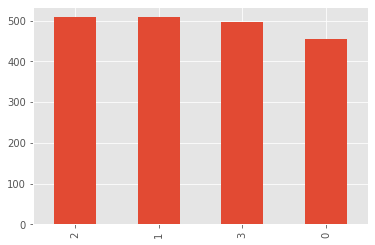

In [10]:
train_data['labeling'].value_counts().plot(kind='bar')

In [11]:
train_data

,title,tag,labeling
136,2016 제3회 항공레저스포츠제전 하이라이트 영상,레저,0
80,여름휴가 떠나기 딱 좋은 국내여행지 추천! 해남 장춘계곡,바다,2
552,"등산 서리산, 처음 만난 5월의 철쭉동산 | 잣나무숲 | 걷기 ASMR",산,3
570,김해가야테마파크 익사이팅 타워 완전 정복! 이제 통영 갈 필요 없다! 부산 근교 익...,레저,0
109,"국내여행 VLOG ? 파크로쉬 리조트에서 야외 온천, 파크키친, 사우나 즐기고 힐링...",산,3
...,...,...,...
7,'해외여행' 온 것 같은 국내 여행지 BEST5 [국내여행],레저,0
205,[김해시보 VR] 2020년 7월 29일 장척계곡의 모습,산,3
208,2013 수상레저스포츠 체험 마당 in 목포,레저,0
534,[TRAVELOG] 6개월 아기와 숲속 힐링 여행떠나기 / 산 중 숙소 밀브릿지 /...,산,3


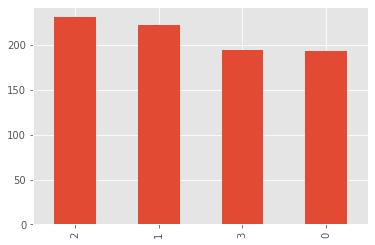

In [12]:
test_data['labeling'].value_counts().plot(kind='bar')

In [13]:
print(train_data.groupby('labeling').size().reset_index(name='count'))
print(test_data.groupby('labeling').size().reset_index(name='count'))

   labeling  count
0         0    456
1         1    508
2         2    508
3         3    496
   labeling  count
0         0    194
1         1    223
2         2    231
3         3    195


In [14]:
stopwords = ['의', '가', '이', '은', '들', '는', '좀', '잘', '걍', '과', '도', '를', '으로', '자', '에', '와', '한', '하다']

In [15]:
# pip uninstall konlpy

In [16]:
pip install konlpy

     |████████████████████████████████| 19.4MB 103.0MB/s 
     |████████████████████████████████| 92kB 8.7MB/s 
     |████████████████████████████████| 3.8MB 24.1MB/s 
  Found existing installation: tweepy 3.6.0
    Uninstalling tweepy-3.6.0:
      Successfully uninstalled tweepy-3.6.0
  Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


In [17]:
test_data.head()

,title,tag,labeling
236,"인제자작나무숲, 왜 이좋은 곳에 인제 왔니~?! 동화속 풍경,우리나라에서 가장 아름...",산,3
115,국내 6월 여행지 영주호 힐링코스 용천루 출렁다리와 산책길,산,3
95,한국기행 - Korea travel_여행책에 없는 강원도 1부- 계곡 따라 걷다보면...,문화,1
398,"유커가 찾는 한국 여행 1순위, 앵무새를 만나다 경주 '버드파크' -핫플레이스 코리아-",문화,1
460,"한국 화장품, 우즈벡 진출 가능성? | 건조한 나라에서 피부관리 잘 하는 법",문화,1


In [18]:
from konlpy.tag import *
from tqdm import tqdm

In [19]:
hannanum = Hannanum()
kkma = Kkma()
komoran = Komoran()
okt = Okt()

In [20]:
X_train = []
X_test = []
try:
    for sentence in tqdm(train_data['title']):
        temp_X = []
        temp_X = okt.morphs(sentence, stem=True) # 토큰화
        temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
        X_train.append(temp_X)
except:
    pass
try:
    for sentence in tqdm(test_data['title']):
        temp_X = []
        temp_X = okt.morphs(sentence, stem=True) # 토큰화
        temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
        X_test.append(temp_X)
except:
    pass

100%|██████████| 843/843 [00:01<00:00, 544.89it/s]


In [21]:
print(X_test[:3])

[['인제', '자작나무숲', ',', '왜', '좋다', '곳', '인제', '오다', '~?!', '동화', '속', '풍경', ',', '우리나라', '에서', '가장', '아름답다', '숲'], ['국내', '6월', '여행지', '영', '주호', '힐링', '코스', '용', '천루', '출렁', '다리', '산책길'], ['한국', '기행', '-', 'Korea', 'travel', '_', '여행', '책', '없다', '강원도', '1', '부', '-', '계곡', '따르다', '걷다', '보다', '_#', '002']]


제목의 최대 길이 :  52
제목의 평균 길이 :  17.16260162601626


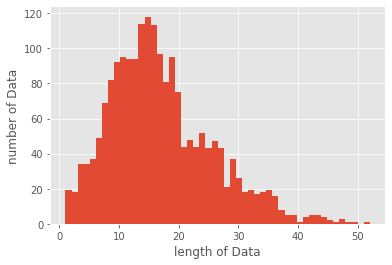

In [22]:
from tensorflow.keras.preprocessing.text import Tokenizer
max_words = 50000
tokenizer = Tokenizer(num_words = max_words)
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

print("제목의 최대 길이 : ", max(len(l) for l in X_train))
print("제목의 평균 길이 : ", sum(map(len, X_train))/ len(X_train))
plt.hist([len(s) for s in X_train], bins=50)
plt.xlabel('length of Data')
plt.ylabel('number of Data')
plt.show()

In [23]:
import numpy as np
y_train = []
y_test = []
for i in range(len(train_data['labeling'])):
    if train_data['labeling'].iloc[i] == 0:
        y_train.append([0, 0, 0, 1])
    elif train_data['labeling'].iloc[i] == 1:
        y_train.append([0, 0, 1, 0])
    elif train_data['labeling'].iloc[i] == 2:
        y_train.append([0, 1, 0, 0])
    elif train_data['labeling'].iloc[i] == 3:
        y_train.append([1, 0, 0, 0])

for i in range(len(test_data['labeling'])):
    if test_data['labeling'].iloc[i] == 0:
        y_test.append([0, 0, 0, 1])
    elif test_data['labeling'].iloc[i] == 1:
        y_test.append([0, 0, 1, 0])
    elif test_data['labeling'].iloc[i] == 2:
        y_test.append([0, 1, 0, 0])
    elif test_data['labeling'].iloc[i] == 3:
        y_test.append([1, 0, 0, 0])

y_train = np.array(y_train)
y_test = np.array(y_test)

In [24]:
from keras.layers import Embedding, Dense, LSTM
from keras.models import Sequential
from keras.preprocessing.sequence import pad_sequences
max_len = 20 # 전체 데이터의 길이를 20로 맞춘다
X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

In [25]:
y_train

array([[0, 0, 0, 1],
       [0, 1, 0, 0],
       [1, 0, 0, 0],
       ...,
       [0, 0, 0, 1],
       [1, 0, 0, 0],
       [0, 1, 0, 0]])

In [26]:
print(X_train.shape); print(y_train.shape)

(1968, 20)
(1968, 4)


In [28]:
model = Sequential()
model.add(Embedding(max_words, 100))
model.add(LSTM(256))
model.add(Dense(4, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
hist = model.fit(X_train, y_train, epochs=10, batch_size=10, validation_split=0.01)

Epoch 1/10
195/195 [==============================] - 7s 33ms/step - loss: 1.0828 - accuracy: 0.5457 - val_loss: 1.0207 - val_accuracy: 0.7000
Epoch 2/10
195/195 [==============================] - 6s 29ms/step - loss: 0.5077 - accuracy: 0.8265 - val_loss: 0.9290 - val_accuracy: 0.7000
Epoch 3/10
195/195 [==============================] - 6s 29ms/step - loss: 0.3040 - accuracy: 0.8896 - val_loss: 0.8131 - val_accuracy: 0.6500
Epoch 4/10
195/195 [==============================] - 6s 29ms/step - loss: 0.2227 - accuracy: 0.9204 - val_loss: 0.7800 - val_accuracy: 0.7500
Epoch 5/10
195/195 [==============================] - 6s 29ms/step - loss: 0.1936 - accuracy: 0.9286 - val_loss: 0.8650 - val_accuracy: 0.7000
Epoch 6/10
195/195 [==============================] - 6s 29ms/step - loss: 0.1665 - accuracy: 0.9302 - val_loss: 0.8377 - val_accuracy: 0.7000
Epoch 7/10
195/195 [==============================] - 6s 29ms/step - loss: 0.1542 - accuracy: 0.9333 - val_loss: 1.0937 - val_accuracy: 0.6500

In [ ]:
predict = model.predict(X_test)

In [ ]:
import numpy as np
predict_labels = np.argmax(predict, axis=1)
original_labels = np.argmax(y_test, axis=1)

In [ ]:
for i in range(30):
    print("제목 : ", test_data['title'].iloc[i], "/\t 원래 라벨 : ", original_labels[i], "/\t예측한 라벨 : ", predict_labels[i])

제목 :  10월가볼만한곳 국내여행추천 가을여행 가족여행지 경남고성 정동목장[자유나니TV] Recommended Autumn Destinations  trip to Korea /	 원래 라벨 :  0 /	예측한 라벨 :  1
제목 :  폭염에 강원 계곡·강·바다서 이틀간 6명 숨져 / YTN /	 원래 라벨 :  1 /	예측한 라벨 :  1
제목 :  한국기행 - Korea travel_계곡따라 여름사냥 3부 칠선계곡에서 만난 여름_#001 /	 원래 라벨 :  1 /	예측한 라벨 :  1
제목 :  계곡여행 여름여행 오지여행 추천!! 2탄 /	 원래 라벨 :  1 /	예측한 라벨 :  1
제목 :  [국내여행] 4탄 (경기도 부천) BEST 3곳  한국만화박물관.한옥체험마을.상동호수공원 /	 원래 라벨 :  3 /	예측한 라벨 :  2
제목 :  [미국을 만나다] 하와이 역사 여행 /	 원래 라벨 :  2 /	예측한 라벨 :  2
제목 :  동해여행10, 동해바다, 강원도고성, 가진해변(여름개장), 가진해수욕장, Korea trip East sea,Seafe Index,압바다, 작고 아담한 해변 /	 원래 라벨 :  1 /	예측한 라벨 :  1
제목 :  국내여행 추천 / 강원도 여행 추천 / #드라이브 월정사 전나무숲 가는 길 드라이브 /	 원래 라벨 :  0 /	예측한 라벨 :  0
제목 :  한국기행 - Korea travel_그해 여름, 울릉도 1부- 그 섬에서 영원히_#002 /	 원래 라벨 :  2 /	예측한 라벨 :  1
제목 :  여름 산행의 백미 '지리산 계곡' / YTN (Yes! Top News) /	 원래 라벨 :  1 /	예측한 라벨 :  0
제목 :  물맑음수목원, 경기도여행, 한국여행, 한국투어, 국내여행, Korea Tour TV /	 원래 라벨 :  3 /	예측한 라벨 :  0
제목 :  한국 방문 Vlog_63 - 장흥 계곡 물놀이/누룽지 백숙/닭 볶음탕/계곡 피서 /	 원래 라벨 :  1 /	예측한 라벨 :  1
제목 :  

In [ ]:
'''
예측 라벨 0 : 산
예측 라벨 1 : 바다
예측 라벨 2 : 문화
예측 라벨 3 : 산
'''

'\n예측 라벨 1 : 산\n예측 라벨 2 : 바다\n예측 라벨 3 : 문화\n예측 라벨 4 : 산\n'

In [ ]:
def WhereYouWantToGo(stred):
    df = pd.DataFrame(data = {'title':[stred]})
    X_test = []
    temp_X = okt.morphs(stred, stem=True) # 토큰화
    temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
    X_test.append(temp_X)
    X_test = tokenizer.texts_to_sequences(X_test)
    X_test = pad_sequences(X_test, maxlen=max_len)
    predict = model.predict(X_test)
    predict_labels = np.argmax(predict, axis=1)
    original_labels = np.argmax(y_test, axis=1)
    return ("제목: ",stred, " 예측한 라벨: ", predict_labels)

In [ ]:
WhereYouWantToGo('나는 더운 여름에 수영을 할 수 있는 해변으로 떠나고 싶어. 파도소리가 들리고 낭만과 운치가 있는 야경을 즐길 수 있는 곳이면 좋겠어')

('제목: ',
 '나는 더운 여름에 수영을 할 수 있는 해변으로 떠나고 싶어. 파도소리가 들리고 낭만과 운치가 있는 야경을 즐길 수 있는 곳이면 좋겠어',
 ' 예측한 라벨: ',
 array([1]))

In [ ]:
String('나는 가족과 함께 바다로 떠나고 싶어')

('제목: ', '나는 가족과 함께 바다로 떠나고 싶어', ' 예측한 라벨: ', array([2]))

In [ ]:
String('야경이 보이는 해변가로 떠나고 싶어')

('제목: ', '야경이 보이는 해변가로 떠나고 싶어', ' 예측한 라벨: ', array([2]))

In [ ]:
String('아이들과 함께 예쁜 야경이 함께하는 해변가 그리고 파도가 거센 바닷가로 떠나자')

('제목: ',
 '아이들과 함께 예쁜 야경이 함께하는 해변가 그리고 파도가 거센 바닷가로 떠나자',
 ' 예측한 라벨: ',
 array([1]))

In [ ]:
String('한적한 야경이 멋진 해변가 근처 바다 호텔')

('제목: ', '한적한 야경이 멋진 해변가 근처 바다 호텔', ' 예측한 라벨: ', array([1]))

In [ ]:
String('한적한 나무가 우거진 곳에서 시원한 공기를 마시고 싶다')

('제목: ', '한적한 나무가 우거진 곳에서 시원한 공기를 마시고 싶다', ' 예측한 라벨: ', array([0]))

In [ ]:
String('나는 가족과 함께 산으로 떠나고 싶어')

('제목: ', '나는 가족과 함께 산으로 떠나고 싶어', ' 예측한 라벨: ', array([0]))

In [ ]:
String('체험')

('제목: ', '체험', ' 예측한 라벨: ', array([3]))